# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 3</span>

## 03.1

La teoria di Black-Scholes assume che l'evoluzione nel tempo del prezzo di un'opzione europea sia stocastica e segua l'andamento di un moto Browniano Geometrico (GBM) con drift $r$ e volatilità $\sigma$ costanti. In questo modo è possibile ottenere una soluzione analitica per il prezzo di un'opzione europea di tipo CALL e di tipo PUT. Appena si abbandonano le assunzioni di Black-Scholes oppure si vogliono prezzare delle opzioni esotiche, non si riesce più a ottenere una soluzione analitica. Si utilizzano allora metodi Monte Carlo.

Il guadagno di chi esercita l'opzione al momento della scadenza, ovvero al tempo $t=T$, è pari al $max[0, S(T)-K]$ per l'opzione CALL e al $max[0, K-S(T)]$ per l'opzione di tipo PUT, in cui $S(T)$ è il prezzo al tempo $T$ e $K$ è il prezzo prestabilito al momento della stipulazione del contratto. Inoltre per stimare il valore al tempo presente è necessario scontare il profitto di un fattore $e^{-rT}$ a causa dell'interesse della banca al tempo di deposito. Il calcolo del prezzo di un'opzione europea al tempo $t=0$ si può ottenere tramite la seguente equazione: 

$$C(S(0), 0) = e^{-rT} max[0, S(T)-K]\ , $$

per un'opzione di tipo CALL e

$$P(S(0), 0) = e^{-rT} max[0, K - S(T)]\ , $$

per un'opzione di tipo PUT.

Il prezzo $S(t)$ segue l'evoluzione di un moto Browniano:

$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]\ , $$

in cui $W(t)\sim\mathcal{N}(0,t)$ e $S(0)$ è il prezzo al tempo iniziale. Inoltre si può campionare $S\sim GBM(\mu,\sigma^2)$ anche tramite una procedura ricorsiva ai tempi $t_1 < t_2 < … < t_n$ utilizzando: $$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]\ , $$
con $Z_i \sim \mathcal{N}(0,1)$.

In questo esercizio ho calcolato il prezzo delle opzioni europee di tipo CALL e PUT utilizzando metodi Monte Carlo e ho confrontato il risultato con la soluzione analitica.

I parametri che ho utilizzato sono:
- il prezzo del bene al tempo $t=0$: $S(0)=100$;
- il tempo $T=1$;
- il prezzo prestabilito $K=100$;
- il tasso di interesse risk-free $r=1$;
- la volatilità $\sigma=0.25$.

Ho stimato al tempo $t=0$ il prezzo di una opzione di tipo CALL e di tipo PUT sia campionando direttamente $S(T)$ per un moto Browniano $GBM(r,\sigma^2)$, sia dividendo l'intervallo $[0, T]$ in $10^2$ sottointervalli e utilizzando la formula discretizzata.

Ho campionato $M=10^5$ valori e ho mediato su $N=100$ blocchi. Riporto il grafico dell'andamento del prezzo delle due opzioni in funzione del numero di blocchi, dove si osserva che sono compatibili con la soluzione analitica.

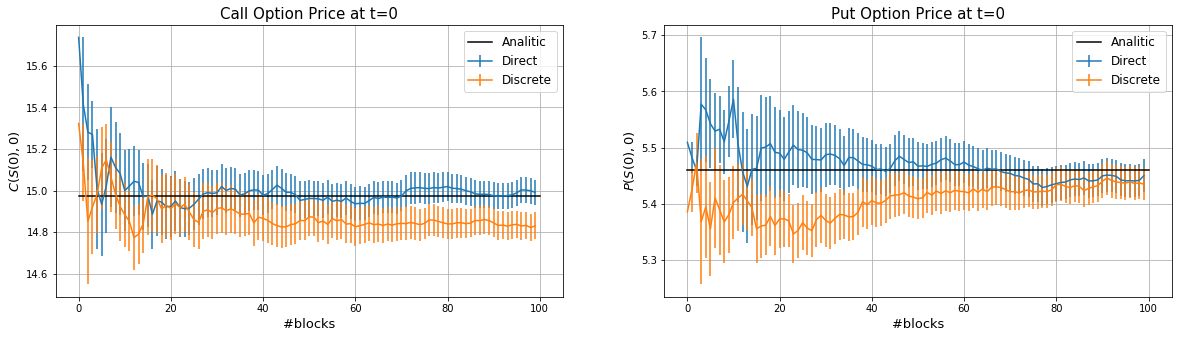

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

M=100000
N=100  
x=np.arange(N)

(C, errC)=np.loadtxt('results.txt', unpack=True, usecols=(0, 1))
(C2, errC2)=np.loadtxt('results2.txt', unpack=True, usecols=(0, 1))
(P, errP)=np.loadtxt('results.txt', unpack=True, usecols=(2, 3))
(P2, errP2)=np.loadtxt('results2.txt', unpack=True, usecols=(2, 3))

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].errorbar(x, C, yerr=errC, label='Direct')
axs[0].errorbar(x, C2, yerr=errC2, label='Discrete')
axs[0].plot([0, N], [14.975790778311286, 14.975790778311286], color='black', label='Analitic')
axs[0].set_title('Call Option Price at t=0', fontsize=15)
axs[0].set_ylabel('$C(S(0),0)$', fontsize=13)

axs[1].errorbar(x, P, yerr=errP, label='Direct')
axs[1].errorbar(x, P2, yerr=errP2, label='Discrete')
axs[1].plot([0, N], [5.4595325819072364, 5.4595325819072364], color='black', label='Analitic')
axs[1].set_title('Put Option Price at t=0', fontsize=15)
axs[1].set_ylabel('$P(S(0),0)$', fontsize=13)

for ax in axs.flat:
    ax.set_xlabel('#blocks', fontsize=13)
    ax.legend(fontsize='large')
    ax.grid(True)